<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment9/Assignment9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/yu4u/cutout-random-erasing
!cp cutout-random-erasing/* 

fatal: destination path 'cutout-random-erasing' already exists and is not an empty directory.
cp: target 'cutout-random-erasing/README.md' is not a directory


In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [4]:
print(train_features[0].shape)
print(num_classes)

(32, 32, 3)
10


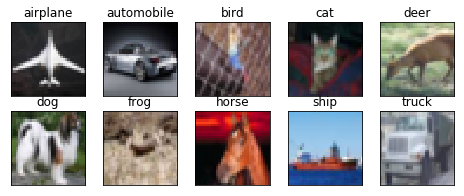

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [12]:
from keras.layers import GlobalMaxPooling2D
# Define the model
# RF 3
# input size 32
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 5
# input size 32
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 10
# input size 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 1, 1, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 12
# input size 16
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# RF 14
# input size 16
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 28
# input size 16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 1, 1, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 30
# input size 8
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 32
# input size 8
model.add(Convolution2D(num_classes, 8, 8))
#model.add(Flatten())
model.add(GlobalMaxPooling2D())
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 128)       512       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8))`


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from random_eraser import get_random_eraser

checkpoint = ModelCheckpoint('modelBest.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=True,
                            featurewise_center=True,
                            featurewise_std_normalization=True,
                            preprocessing_function=get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,
                  v_l=0, v_h=1, pixel_level=True))
datagen.fit(train_features)
testgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)
testgen.fit(test_features)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = testgen.flow(test_features, test_labels), validation_steps=100, verbose=1,
                                callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=100, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 57s 146ms/step - loss: 2.0593 - acc: 0.4114 - val_loss: 1.7777 - val_acc: 0.5178

Epoch 00001: val_acc improved from -inf to 0.51781, saving model to modelBest.h5
Epoch 2/50
390/390 [==============================] - 54s 138ms/step - loss: 1.6694 - acc: 0.5064 - val_loss: 1.9747 - val_acc: 0.5647

Epoch 00002: val_acc improved from 0.51781 to 0.56469, saving model to modelBest.h5
Epoch 3/50
390/390 [==============================] - 54s 137ms/step - loss: 1.4812 - acc: 0.5493 - val_loss: 2.8206 - val_acc: 0.5347

Epoch 00003: val_acc did not improve from 0.56469
Epoch 4/50
390/390 [==============================] - 54s 138ms/step - loss: 1.4154 - acc: 0.5634 - val_loss: 1.2365 - val_acc: 0.5744

Epoch 00004: val_acc improved from 0.56469 to 0.57443, saving model to modelBest.h5
Epoch 5/50
390/390 [==============================] - 54s 138ms/step - loss: 1.1437 - acc: 0.6103 - val_loss: 1.0358 - val_acc: 0.6378

Epoch 00005: val_acc 

KeyboardInterrupt: ignored

In [0]:
from google.colab import files
files.download('modelBest.h5') 

In [0]:
from google.colab import files
files.upload()

In [0]:
from keras.models import load_model
modelBest = load_model("modelBest.h5")

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
test_index = 4
img = test_features[test_index]
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

predgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)

predgen.fit(test_features)

pred_generator = predgen.flow(test_features, test_labels,
  shuffle=False)

y_pred = modelBest.predict_generator(pred_generator, steps=1) 

In [0]:
for test_index in range(10):
  print(test_index, np.argmax(y_pred[test_index]), np.argmax(test_labels[test_index]))
  

0 3 3
1 5 8
2 8 8
3 0 0
4 4 6
5 6 6
6 3 1
7 6 6
8 6 3
9 6 1


In [0]:
#preds = modelBest.predict(x)
#print(preds)
#print(test_labels[test_index])

In [0]:
class_idx = np.argmax(y_pred[0])
class_output = modelBest.output[:, class_idx]
last_conv_layer = modelBest.get_layer("conv2d_8")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape[0])
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([modelBest.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

?


In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(32, 32, 3)


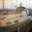

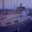

-1

In [0]:
from google.colab.patches import cv2_imshow
#img = cv2.imread(img_path)
img = test_features[2]
print(img.shape)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
img = np.uint8(255 * img)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype =cv2.CV_8UC1)
cv2_imshow(img)
cv2_imshow(superimposed_img)
cv2.waitKey(0)
#plt.imshow(img)
#plt.imshow(superimposed_img)
#plt.show()

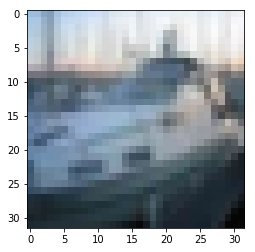

In [0]:
plt.imshow(img)
plt.show()

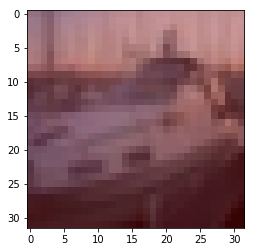

In [0]:
plt.imshow(superimposed_img)
plt.show()